In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
import cv2
import PIL
from PIL import Image

from sklearn.model_selection import train_test_split
import os



In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"glockind","key":"edd342bef995d88dfd15f532a9ae6230"}'}

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
100% 163M/163M [00:01<00:00, 102MB/s]
100% 163M/163M [00:01<00:00, 104MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "/content/face-mask-dataset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
without_mask_files = os.listdir('/content/data/without_mask')

In [ ]:
print(len(with_mask_files))
print(len(without_mask_files))

3725
3828


In [ ]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [ ]:
labels = with_mask_labels + without_mask_labels
print(len(labels))

7553


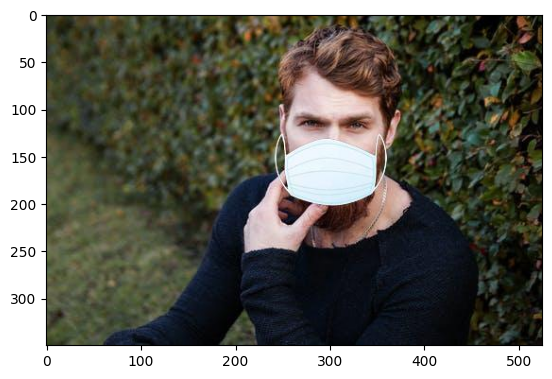

In [ ]:
img = mpimg.imread('/content/data/with_mask/with_mask_1.jpg')
imgplot = plt.imshow(img)
plt.show()

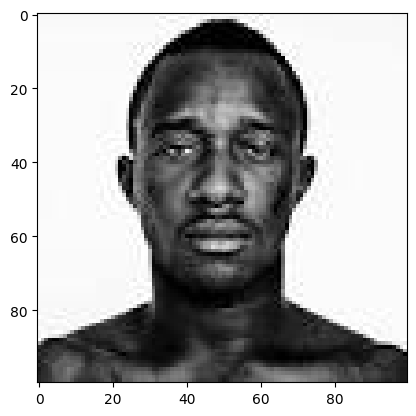

In [ ]:
img = mpimg.imread('/content/data/without_mask/without_mask_1.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
with_mask_path = '/content/data/with_mask/'
without_mask_path = '/content/data/without_mask/'

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
X = np.array(data)
y = np.array(labels)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.6912 - loss: 0.7029 - val_accuracy: 0.8744 - val_loss: 0.2765
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.8888 - loss: 0.2903 - val_accuracy: 0.8678 - val_loss: 0.2973
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9141 - loss: 0.2275 - val_accuracy: 0.8826 - val_loss: 0.3072
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9264 - loss: 0.2101 - val_accuracy: 0.9157 - val_loss: 0.2502
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9404 - loss: 0.1495 - val_accuracy: 0.9190 - val_loss: 0.2068


In [ ]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test accuracy:', accuracy)
print

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9228 - loss: 0.2313
Test accuracy: 0.9245532751083374


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [ ]:
from PIL import Image
import numpy as np

def predict_mask(image_path):
  image = Image.open(image_path)
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  image = image / 255.0

  image = image.reshape(1, 128, 128, 3)

  prediction = model.predict(image)
  return np.argmax(prediction)





In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HowToMakeAMask_Cover_1-square640.jpg to HowToMakeAMask_Cover_1-square640.jpg


In [ ]:
image_path = list(uploaded.keys())[0]
predicted_class = predict_mask(image_path)
print(predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1


In [ ]:
if predicted_class == 0:
  print("The person in the image is not wearing a mask")
else:
  print("The person in the image is wearing a mask")

The person in the image is wearing a mask


# New Section